In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [2]:
data = pd.read_csv("1.02.Multiple-linear-regression.csv")
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT         84 non-null     int64  
 1   GPA         84 non-null     float64
 2   Rand 1,2,3  84 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.1 KB


In [5]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


# Multiple linear regression

In [6]:
y =data["GPA"]
x1 = data.drop("GPA",axis =1)


In [8]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           6.58e-10
Time:                        22:21:57   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# now dealing with the data having an categorical column 

In [9]:
d = pd.read_csv("1.03.Dummies.csv")
d.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [10]:
d.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [11]:
dum =d.copy()

In [13]:
dum["Attendance"]=dum["Attendance"].map({'Yes':1,'No':0})

In [14]:
dum.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


In [15]:
dum.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [18]:
dum['Attendance'].value_counts()

0    45
1    39
Name: Attendance, dtype: int64

# Creating a  regression model

In [19]:
y = dum["GPA"]
x1 = dum.drop("GPA",axis=1)

In [22]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           2.19e-15
Time:                        23:05:17   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

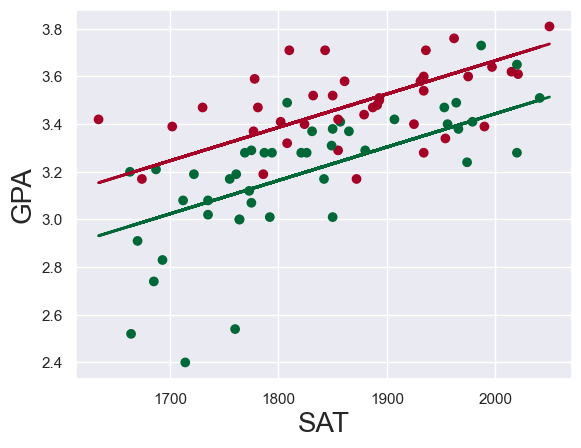

In [28]:
plt.scatter(dum["SAT"],y,c=dum["Attendance"],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data["SAT"]
yhat_yes = 0.6439 +0.0014*data["SAT"]+0.2226
fig = plt.plot(dum["SAT"],yhat_no,lw=2,c='#006837')
fig = plt.plot(dum["SAT"],yhat_yes,lw=2,c= '#a50026')
plt.xlabel("SAT",fontsize=20)
plt.ylabel("GPA",fontsize=20)
plt.show()

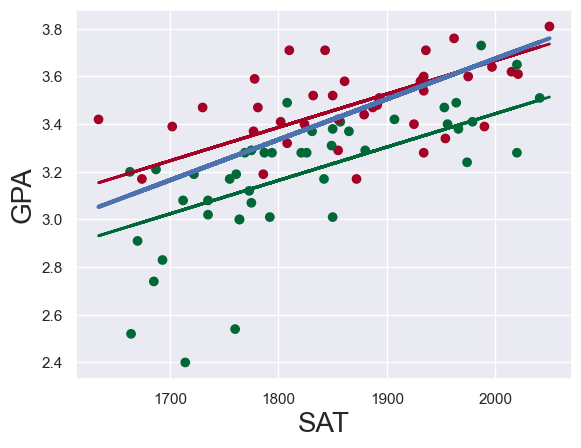

In [30]:
plt.scatter(dum["SAT"],y,c=dum["Attendance"],cmap='RdYlGn_r')
yhat = 0.0017*dum['SAT']+0.275
yhat_no = 0.6439 + 0.0014*data["SAT"]
yhat_yes = 0.6439 +0.0014*data["SAT"]+0.2226
fig = plt.plot(dum["SAT"],yhat_no,lw=2,c='#006837')
fig = plt.plot(dum["SAT"],yhat_yes,lw=2,c= '#a50026')
fig = plt.plot(dum["SAT"],yhat,lw=3,c= '#4C72B0')
plt.xlabel("SAT",fontsize=20)
plt.ylabel("GPA",fontsize=20)
plt.show()

# making some predictions


In [31]:
new_data = pd.DataFrame({'conts':1,"SAT":[1700,1670],'Attendance':[0,1]})
new_data

,conts,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [33]:
predictions = result.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [34]:
predictionsdf = pd.DataFrame({'predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0:'BOB',1:'Alex'})


,conts,SAT,Attendance,predictions
BOB,1,1700,0,3.023513
Alex,1,1670,1,3.204163


# using SCI-KIT learn or sklearn

In [1]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [4]:
dataa = pd.read_csv("1.02.Multiple-linear-regression.csv")
dataa.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [6]:
dataa.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [26]:
x = dataa.drop("GPA",axis = 1)
y = dataa["GPA"]


In [9]:
reg.fit(x,y)

LinearRegression()

In [10]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [11]:
reg.intercept_

0.29603261264909353

# adjusted r2

In [17]:
def adjusted_r2(r2,n,p):
    return 1 - (1-r2) * (n-1)/(n-p-1)
r2 = reg.score(x,y)
n = x.shape[0]
p = x.shape[1]
adjusted_r2(r2,n,p)

0.3920313482513401

# feature selection 

In [18]:
from sklearn.feature_selection import f_regression
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [20]:
p_values = f_regression(x,y)[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

In [21]:
p_values.round(3)

array([0.   , 0.676])

# creating a summary table

In [27]:
reg_summ = pd.DataFrame(data = x.columns.values , columns = ["features"])
reg_summ

,features
0,SAT
1,"Rand 1,2,3"


In [28]:
reg_summ["cofficients"]= reg.coef_
reg_summ["p_values"]= p_values.round(3)

In [29]:
reg_summ

,features,cofficients,p_values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676
